## the best model for regression : Random forest regressor
## the best model for classification :  Gradient Boosting Classifie

In [2]:
import numpy as np
import pandas as pd
scoring = pd.DataFrame([
    
    ('Linear Regression', '{}', 'mean_squared_log_error', '0.1537845886027393'),
    ('Lasso', '{alpha=0.0003}', 'mean_squared_log_error', '0.15427888353766772'),
    ('Ridge', '{alpha=0.03}', 'mean_squared_log_error', '0.1548455690931782'),
    
    
    ('Decision Tree Regressor', '{max_depth=5, random_state=47}', 'mean_squared_log_error', '0.14864825177259933'),
    ('Random Forest Regressor', '{max_depth=15, n_estimators=150, random_state=47}', 'mean_squared_log_error', '0.13576826636635567'),
    ('Gradient Boosting Regressor', '{learning_rate = 0.1, max_depth= 5, n_estimators= 100, random_state= 47}', 'mean_squared_log_error', ' 0.1383707652014666'),
    
    
    ('Logistic Regression', '{}', 'roc_auc_score', '0.9680729188783352'),
    ('Log Reg + L1', '{C=0.3}', 'roc_auc_score', '0.968270105590887'),
    ('Log Reg + L2', '{C=10}', 'roc_auc_score', '0.9680729188783352'),
    
    
    ('Decision Tree Classifier', '{max_depth=5, random_state=47}', 'roc_auc_score', '0.9476064966358546'),
    ('Random Forest Classifier', '{max_depth=12, n_estimators=150, random_state=47}', 'roc_auc_score', '0.9695094681244177'),
    ('Gradient Boosting Classifier', '{learning_rate= 0.1, max_depth= 5, n_estimators= 100, random_state= 47}', 'roc_auc_score', '0.9720308830983204'),
], columns=['alg', 'hyperparametes', 'metric_name', 'metric_value'])

scoring

,alg,hyperparametes,metric_name,metric_value
0,Linear Regression,{},mean_squared_log_error,0.1537845886027393
1,Lasso,{alpha=0.0003},mean_squared_log_error,0.15427888353766772
2,Ridge,{alpha=0.03},mean_squared_log_error,0.1548455690931782
3,Decision Tree Regressor,"{max_depth=5, random_state=47}",mean_squared_log_error,0.14864825177259933
4,Random Forest Regressor,"{max_depth=15, n_estimators=150, random_state=47}",mean_squared_log_error,0.13576826636635567
5,Gradient Boosting Regressor,"{learning_rate = 0.1, max_depth= 5, n_estimato...",mean_squared_log_error,0.1383707652014666
6,Logistic Regression,{},roc_auc_score,0.9680729188783352
7,Log Reg + L1,{C=0.3},roc_auc_score,0.968270105590887
8,Log Reg + L2,{C=10},roc_auc_score,0.9680729188783352
9,Decision Tree Classifier,"{max_depth=5, random_state=47}",roc_auc_score,0.9476064966358546


In [3]:
import pandas as pd 
import numpy as np 

In [4]:
train = pd.read_csv("f__processed_train.csv")
test = pd.read_csv("f__processed_test.csv")

In [7]:
# Remove the column 'f__house_age' from train_raw
train.drop(columns=['f__house_age'], inplace=True)

# Remove the column 'f__house_age' from submission
test.drop(columns=['f__house_age'], inplace=True)


In [11]:
train = train.abs()
test = test.abs()


In [12]:
train.head()

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__income_category_Less than $40K,f__income_category_Unknown,f__income_category_target_churn,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance
0,3.713837e-16,7.764994e-16,0.978491,0.192173,0.291179,0.173623,0.294846,0.519139,1.246955,2.127038,...,1.064311,0.248245,0.522108,1.649597,0.507744,1.773843,0.514219,28.022145,0.910987,0.682169
1,3.713837e-16,7.764994e-16,1.434332,0.684113,0.195253,0.167833,0.238810,0.519139,0.570351,0.338808,...,0.939575,0.248245,0.697216,1.829985,0.824830,0.591262,0.599530,0.851930,0.011830,0.482197
2,3.713837e-16,7.764994e-16,1.293152,3.697314,0.291179,0.966898,0.806069,0.519139,0.247580,0.176241,...,0.939575,0.248245,0.697216,1.990957,0.390360,1.470505,0.367409,0.658292,0.809290,0.904256
3,3.713837e-16,7.764994e-16,0.851098,1.068458,0.291179,0.150635,0.005074,0.519139,2.216644,0.176241,...,0.939575,0.248245,2.493620,0.906244,0.691469,0.486958,0.358060,85.715613,0.153495,0.718291
4,3.713837e-16,7.764994e-16,0.490350,1.068458,2.951698,1.378012,0.918679,0.519139,0.288041,1.801905,...,1.064311,0.248245,0.522108,0.658707,0.807905,0.586855,1.459251,0.851930,0.259034,0.246374


In [13]:
test.head()

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__income_category_target_churn,__price_doc,__churn,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance
0,1.352851,1.195766,0.671994,0.685651,0.234314,2.158285,0.030654,1.322431,1.818989e-12,0.011007,...,0.036059,0.0,0.0,0.361585,0.836489,0.339508,5.138130,1.328219,0.651822,0.355896
1,0.492178,1.195766,0.525274,0.243560,0.098894,0.036025,0.258511,0.506486,1.818989e-12,0.159979,...,0.682948,0.0,0.0,0.661494,0.195068,9.482775,1.060685,28.210698,0.862099,1.314192
2,0.511940,0.061531,0.144686,0.685651,0.104236,0.082837,0.789502,2.335403,1.818989e-12,0.584878,...,0.517550,0.0,0.0,1.644017,0.468821,2.709209,0.860926,27.038018,0.416897,1.771519
3,0.635624,1.195766,0.464137,0.685651,0.302024,0.392966,0.027322,0.506486,1.818989e-12,0.904835,...,0.036059,0.0,0.0,1.661360,0.705017,0.029666,1.122473,1.305912,0.931714,0.250877
4,5.082434,1.318829,0.107749,0.685651,0.234314,1.024927,0.329288,0.506486,1.818989e-12,0.606892,...,0.517550,0.0,0.0,0.140560,0.197511,0.499814,0.674629,28.210698,0.122100,0.017108


In [14]:
from sklearn.model_selection import train_test_split

X_regression = train.drop(columns=['__price_doc','__churn'])
y_regression = train['__price_doc']
X_classification = train.drop(columns=['__churn','__price_doc'])
y_classification = train['__churn']

In [15]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=47)
X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=47)

In [16]:
print('X_regression_train: ',X_regression_train.shape)
print('y_regression_train: ',y_regression_train.shape)
print('X_regression_test: ',X_regression_test.shape)
print('y_regression_test: ',y_regression_test.shape)
print('*'*80)
print('X_classification_train: ',X_classification_train.shape)
print('y_classification_train: ',y_classification_train.shape)
print('X_classification_test: ',X_classification_test.shape)
print('y_classification_test: ',y_classification_test.shape)

X_regression_train:  (14338, 60)
y_regression_train:  (14338,)
X_regression_test:  (6145, 60)
y_regression_test:  (6145,)
********************************************************************************
X_classification_train:  (14338, 60)
y_classification_train:  (14338,)
X_classification_test:  (6145, 60)
y_classification_test:  (6145,)


# Decision Tree Regressor

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [18]:
decision_reg = DecisionTreeRegressor()

param_grid = { 'max_depth': [3, 5, 7 , 8 , 10 , 12 ],'random_state': [47]}
grid_search_decision = GridSearchCV(decision_reg, param_grid, cv=5)
grid_search_decision.fit(X_regression_train, y_regression_train)
decision_best = grid_search_decision.best_estimator_

sorted(grid_search_decision.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_decision.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', grid_search_decision.best_score_)
print('Best Parameters are :', grid_search_decision.best_params_)
print('Best Estimator is :', grid_search_decision.best_estimator_)


All Results are :
    mean_test_score  std_test_score                                 params  \
0         0.324908        0.042579   {'max_depth': 3, 'random_state': 47}   
1         0.367138        0.053838   {'max_depth': 5, 'random_state': 47}   
2         0.287386        0.129909   {'max_depth': 7, 'random_state': 47}   
3         0.284008        0.067530   {'max_depth': 8, 'random_state': 47}   
4         0.247826        0.127928  {'max_depth': 10, 'random_state': 47}   
5         0.085297        0.373343  {'max_depth': 12, 'random_state': 47}   

   rank_test_score  mean_fit_time  
0                2       0.270651  
1                1       0.826548  
2                3       1.150206  
3                4       1.575010  
4                5       1.921031  
5                6       2.207323  
Best Score is : 0.36713839059602804
Best Parameters are : {'max_depth': 5, 'random_state': 47}
Best Estimator is : DecisionTreeRegressor(max_depth=5, random_state=47)


# mean_squared_log_error for Decision Tree Regressor

In [19]:
from sklearn.metrics import mean_squared_log_error

mse_log_decision_reg = mean_squared_log_error(y_regression_test, decision_best.predict(X_regression_test))
print('mse_log_decision_reg :' , mse_log_decision_reg )

mse_log_decision_reg : 0.07090878455715187


# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
random_reg = RandomForestRegressor()

param_grid = { 'n_estimators': [ 70 , 100 ] ,'max_depth': [ 5, 8 ],'random_state': [47]}
grid_search_random = GridSearchCV(random_reg, param_grid, cv=5,n_jobs=-1)
grid_search_random.fit(X_regression_train, y_regression_train)
random_best = grid_search_random.best_estimator_

sorted(grid_search_random.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_random.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', grid_search_random.best_score_)
print('Best Parameters are :', grid_search_random.best_params_)
print('Best Estimator is :', grid_search_random.best_estimator_)

All Results are :
    mean_test_score  std_test_score  \
0         0.448018        0.053159   
1         0.449583        0.056362   
2         0.486622        0.058081   
3         0.488964        0.062427   

                                              params  rank_test_score  \
0  {'max_depth': 5, 'n_estimators': 70, 'random_s...                4   
1  {'max_depth': 5, 'n_estimators': 100, 'random_...                3   
2  {'max_depth': 8, 'n_estimators': 70, 'random_s...                2   
3  {'max_depth': 8, 'n_estimators': 100, 'random_...                1   

   mean_fit_time  
0      69.718876  
1      95.858484  
2     108.003642  
3     136.185125  
Best Score is : 0.48896396095021866
Best Parameters are : {'max_depth': 8, 'n_estimators': 100, 'random_state': 47}
Best Estimator is : RandomForestRegressor(max_depth=8, random_state=47)


# mean_squared_log_error for Random Forest Regressor

In [23]:
mse_log_random_reg = mean_squared_log_error(y_regression_test, random_best.predict(X_regression_test))
print('mse_log_random_reg :' , mse_log_random_reg )

mse_log_random_reg : 0.05883193721550818


# Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import  GradientBoostingRegressor

In [25]:
gradient_reg = GradientBoostingRegressor()

param_grid = { 'n_estimators': [ 70 , 100  ] ,'max_depth': [ 5, 8 ],'learning_rate': [0.01, 0.1],'random_state': [47]}
grid_search_gradient = GridSearchCV(gradient_reg, param_grid, cv=5,  n_jobs=-1)
grid_search_gradient.fit(X_regression_train, y_regression_train)
gradient_best = grid_search_gradient.best_estimator_

sorted(grid_search_gradient.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_gradient.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', grid_search_gradient.best_score_)
print('Best Parameters are :', grid_search_gradient.best_params_)
print('Best Estimator is :', grid_search_gradient.best_estimator_)

All Results are :
    mean_test_score  std_test_score  \
0         0.327210        0.035814   
1         0.383805        0.042039   
2         0.353290        0.053074   
3         0.404372        0.064410   
4         0.513202        0.067730   
5         0.515862        0.072039   
6         0.502330        0.084625   
7         0.503287        0.084831   

                                              params  rank_test_score  \
0  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...                8   
1  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...                6   
2  {'learning_rate': 0.01, 'max_depth': 8, 'n_est...                7   
3  {'learning_rate': 0.01, 'max_depth': 8, 'n_est...                5   
4  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...                2   
5  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...                1   
6  {'learning_rate': 0.1, 'max_depth': 8, 'n_esti...                4   
7  {'learning_rate': 0.1, 'max_depth': 8, 'n_esti...  

# mean_squared_log_error Gradient Boosting Regressor

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Apply a logarithmic transformation with an offset to handle negative and zero values
y_regression_test_transformed = np.log1p(y_regression_test)
y_pred_transformed = np.log1p(gradient_best.predict(X_regression_test))

# Compute mean squared error on transformed values
mse_log_gradient_reg = mean_squared_error(y_regression_test_transformed, y_pred_transformed)
print('mse_log_gradient_reg:', mse_log_gradient_reg)

mse_log_gradient_reg: 0.05494141856443973


# classification 

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Example: Convert continuous labels into discrete classes using binning
# Define bins for binning the continuous labels
bins = np.linspace(min(y_classification_train), max(y_classification_train), num=5)
# Apply binning to convert continuous labels into discrete classes for both train and test sets
y_classification_train_binned = np.digitize(y_classification_train, bins)
y_classification_test_binned = np.digitize(y_classification_test, bins)

# Initialize DecisionTreeClassifier
decision_clas = DecisionTreeClassifier()

# Define parameter grid for grid search
param_grid = {
    'max_depth': [5, 8],
    'random_state': [47]
}

# Perform grid search
grid_search_decision_C = GridSearchCV(decision_clas, param_grid, cv=5, n_jobs=-1)
grid_search_decision_C.fit(X_classification_train, y_classification_train_binned)

# Get the best estimator from the grid search
decision_best_C = grid_search_decision_C.best_estimator_

# Print GridSearchCV results
print('All Results are :\n', GridSearchResults)
# Print best score and parameters
print('Best Score is :', grid_search_decision_C.best_score_)
print('Best Parameters are :', grid_search_decision_C.best_params_)
# Print best estimator
print('Best Estimator is :', grid_search_decision_C.best_estimator_)

# Calculate ROC AUC score using the best estimator and the test set
roc_auc_decision = roc_auc_score(y_classification_test_binned, decision_best_C.predict_proba(X_classification_test)[:, 1])
print('roc_auc_decision:', roc_auc_decision)


All Results are :
    mean_test_score  std_test_score                                params  \
0         0.899359        0.005931  {'max_depth': 5, 'random_state': 47}   
1         0.897615        0.004644  {'max_depth': 8, 'random_state': 47}   

   rank_test_score  mean_fit_time  
0                1       0.434036  
1                2       0.572433  
Best Score is : 0.8993589827785909
Best Parameters are : {'max_depth': 5, 'random_state': 47}
Best Estimator is : DecisionTreeClassifier(max_depth=5, random_state=47)
roc_auc_decision: 0.9372340000634346


# roc_auc_score Decision Tree Classifier

In [48]:
# Calculate ROC AUC score using the best estimator and the test set
roc_auc_decision = roc_auc_score(y_classification_test_binned, decision_best_C.predict_proba(X_classification_test)[:, 1])
print('roc_auc_decision:', roc_auc_decision)

roc_auc_decision: 0.9372340000634346


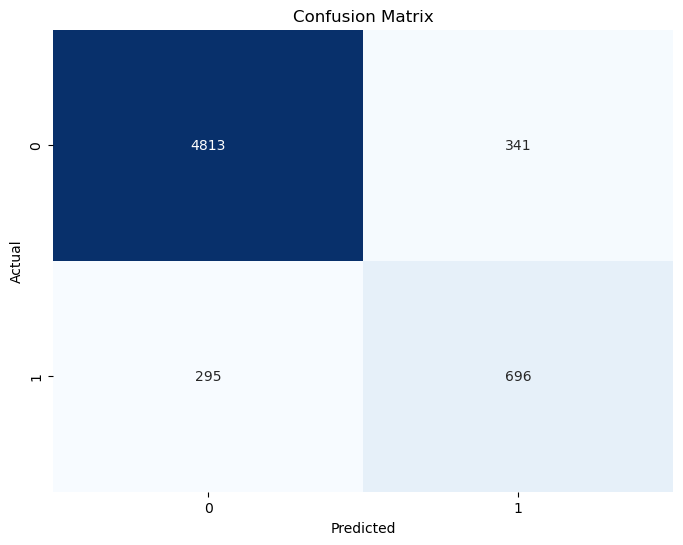

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Convert continuous labels into discrete classes using binning
# Define bins for binning the continuous labels
bins = np.linspace(min(y_classification_train), max(y_classification_train), num=5)
# Apply binning to convert continuous labels into discrete classes for the test set
y_classification_test_binned = np.digitize(y_classification_test, bins)

# Predict classes using the best estimator
y_pred = decision_best_C.predict(X_classification_test)

# Calculate confusion matrix
cm = confusion_matrix(y_classification_test_binned, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
y_classification_train_encoded = label_encoder.fit_transform(y_classification_train)

random_clas = RandomForestClassifier()
param_grid = {'n_estimators': [70, 100], 'max_depth': [5, 8], 'random_state': [47]}
grid_search_random_C = GridSearchCV(random_clas, param_grid, cv=5, n_jobs=-1)
grid_search_random_C.fit(X_classification_train, y_classification_train_encoded)
random_best_C = grid_search_random_C.best_estimator_

# Extract and print grid search results
sorted(grid_search_random_C.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_random_C.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults)
print('Best Score is :', grid_search_random_C.best_score_)
print('Best Parameters are :', grid_search_random_C.best_params_)
print('Best Estimator is :', grid_search_random_C.best_estimator_)


All Results are :
    mean_test_score  std_test_score  \
0         0.860929        0.001577   
1         0.860231        0.001147   
2         0.900126        0.004791   
3         0.899777        0.004137   

                                              params  rank_test_score  \
0  {'max_depth': 5, 'n_estimators': 70, 'random_s...                3   
1  {'max_depth': 5, 'n_estimators': 100, 'random_...                4   
2  {'max_depth': 8, 'n_estimators': 70, 'random_s...                1   
3  {'max_depth': 8, 'n_estimators': 100, 'random_...                2   

   mean_fit_time  
0       6.901591  
1       8.846581  
2      10.374432  
3      12.751244  
Best Score is : 0.9001257516519194
Best Parameters are : {'max_depth': 8, 'n_estimators': 70, 'random_state': 47}
Best Estimator is : RandomForestClassifier(max_depth=8, n_estimators=70, random_state=47)


# roc_auc_score Random Forest Classifier

In [57]:
# Binning the continuous target variable into categories
bins = np.linspace(min(y_classification_train), max(y_classification_train), 5)
y_classification_train_binned = np.digitize(y_classification_train, bins)
y_classification_test_binned = np.digitize(y_classification_test, bins)

# Train the model using the binned target variable
grid_search_random_C.fit(X_classification_train, y_classification_train_binned)
random_best_C = grid_search_random_C.best_estimator_

# Calculate ROC AUC score using the best estimator
roc_auc_random = roc_auc_score(y_classification_test_binned, random_best_C.predict_proba(X_classification_test)[:, 1])
print('roc_auc_random:', roc_auc_random)


roc_auc_random: 0.9523305794055698


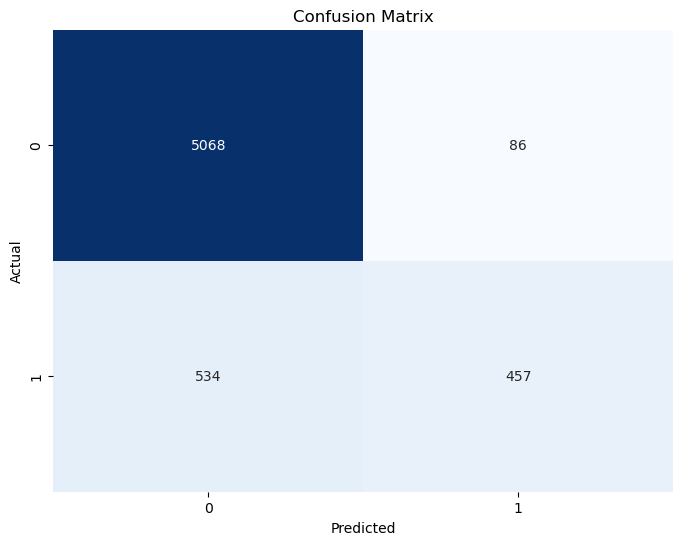

In [62]:
from sklearn.metrics import confusion_matrix

# Binarize the true labels
y_classification_test_binarized = (y_classification_test > 0.5).astype(int)

# Binarize the predicted probabilities
y_pred_binarized = (random_best_C.predict_proba(X_classification_test)[:, 1] > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_classification_test_binarized, y_pred_binarized)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
# Define the criterion to convert continuous target variable to binary classes
cutoff_value = 0.5  # Example cutoff value, adjust as needed

# Convert continuous target variable to binary classes
y_classification_train_binary = (y_classification_train > cutoff_value).astype(int)

# Define and fit the GradientBoostingClassifier
gradient_clas = GradientBoostingClassifier()
param_grid = {'n_estimators': [70, 100],
              'max_depth': [5, 7],
              'learning_rate': [0.001, 0.01],
              'random_state': [47]}
grid_search_gradient_C = GridSearchCV(gradient_clas, param_grid, cv=5, n_jobs=-1)
grid_search_gradient_C.fit(X_classification_train, y_classification_train_binary)
gradient_best_C = grid_search_gradient_C.best_estimator_

# Display the results
sorted(grid_search_gradient_C.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_gradient_C.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']]

print('All Results are:\n', GridSearchResults)
print('Best Score is:', grid_search_gradient_C.best_score_)
print('Best Parameters are:', grid_search_gradient_C.best_params_)
print('Best Estimator is:', grid_search_gradient_C.best_estimator_)




All Results are:
    mean_test_score  std_test_score  \
0         0.838611        0.000125   
1         0.838611        0.000125   
2         0.838611        0.000125   
3         0.838611        0.000125   
4         0.876273        0.001285   
5         0.883945        0.003472   
6         0.877180        0.004611   
7         0.897196        0.003925   

                                              params  rank_test_score  \
0  {'learning_rate': 0.001, 'max_depth': 5, 'n_es...                5   
1  {'learning_rate': 0.001, 'max_depth': 5, 'n_es...                5   
2  {'learning_rate': 0.001, 'max_depth': 7, 'n_es...                5   
3  {'learning_rate': 0.001, 'max_depth': 7, 'n_es...                5   
4  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...                4   
5  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...                2   
6  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...                3   
7  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...   

# roc_auc_score Gradient Boosting Classifier

In [73]:
from sklearn.preprocessing import label_binarize

# Define the cutoff value for binarization
cutoff_value = 0.5

# Binarize the test target variable
y_classification_test_binary = (y_classification_test > cutoff_value).astype(int)

# Calculate ROC AUC score using the best estimator
roc_auc_gradient = roc_auc_score(y_classification_test_binary, gradient_best_C.predict_proba(X_classification_test)[:, 1])
print('roc_auc_gradient:', roc_auc_gradient)


roc_auc_gradient: 0.9484479445784275


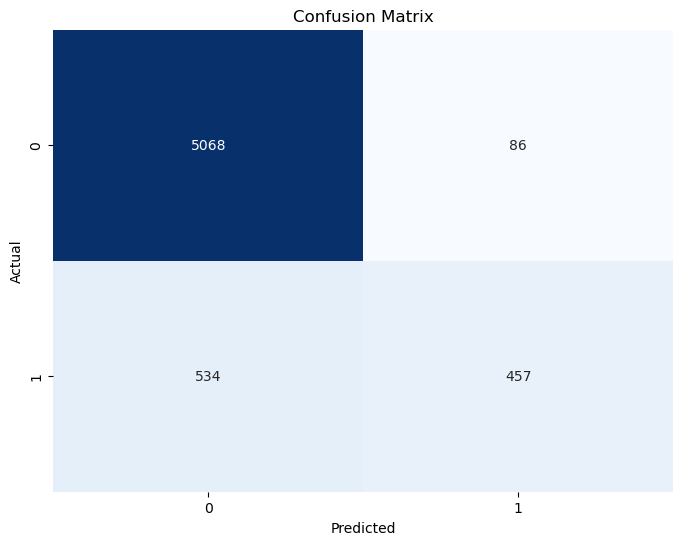

In [74]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Binning the continuous target variable into categories
bins = np.linspace(min(y_classification_train), max(y_classification_train), 5)
y_classification_train_binned = np.digitize(y_classification_train, bins)
y_classification_test_binned = np.digitize(y_classification_test, bins)

# Convert predicted labels to binary
y_pred_binary = label_binarize(y_pred, classes=np.unique(y_classification_test_binned))

# Convert true labels to binary
y_test_binary = label_binarize(y_classification_test_binned, classes=np.unique(y_classification_test_binned))

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [81]:
# Check feature names in the training data
print("Training Data Feature Names:", X_classification_train.columns.tolist())

# Check feature names in the test data
print("Test Data Feature Names:", test.columns.tolist())


Training Data Feature Names: ['max_floor', 'state', 'total_revolving_bal', 'market_count_1500', 'leisure_count_3000', 'total_ct_chng_q4_q1', 'railroad_station_walk_km', 'contacts_count_12_mon', '0_17_all', 'trc_count_2000', 'build_count_wood', 'credit_limit', 'total_trans_ct', 'leisure_count_5000', 'life_sq', 'cafe_count_1000_price_1000', 'mkad_km', 'school_education_centers_top_20_raion', 'avg_utilization_ratio', 'public_transport_station_min_walk', 'customer_age', 'detention_facility_km', 'sport_count_2000', 'cafe_sum_1000_min_price_avg', 'total_amt_chng_q4_q1', 'metro_km_walk', 'office_sqm_5000', 'total_trans_amt', 'months_inactive_12_mon', 'cafe_sum_1500_min_price_avg', 'floor', 'num_room', 'months_on_book', 'dependent_count', 'avg_open_to_buy', 'build_year', 'full_sq', 'total_relationship_count', 'build_count_mix', 'f__metro_km_walk', 'f__credit_limit', 'f__state', 'f__build_year', 'f_1_credit_limit', 'f__mkad_km_encode', 'f_2_mkad_km', 'f__income_category_$120K +', 'f__income_cat

In [82]:
# Remove the additional features from the test data
test_processed = test.drop(columns=['__price_doc', '__churn'])

# Now, you can make predictions using the preprocessed test data
classification_predictions = gradient_best_C.predict_proba(test_processed)
pro = classification_predictions[:, 1]
regression_predictions = random_best.predict(test_processed)


In [83]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

In [84]:
test['__price_predict']=regression_predictions
test['__churn_prob']=pro
test['__priority'] = test.apply(alg1, axis=1)
test.head()

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance,__price_predict,__churn_prob,__priority
0,1.352851,1.195766,0.671994,0.685651,0.234314,2.158285,0.030654,1.322431,1.818989e-12,0.011007,...,0.361585,0.836489,0.339508,5.138130,1.328219,0.651822,0.355896,0.414180,0.616080,0.414180
1,0.492178,1.195766,0.525274,0.243560,0.098894,0.036025,0.258511,0.506486,1.818989e-12,0.159979,...,0.661494,0.195068,9.482775,1.060685,28.210698,0.862099,1.314192,0.852700,0.059338,0.852700
2,0.511940,0.061531,0.144686,0.685651,0.104236,0.082837,0.789502,2.335403,1.818989e-12,0.584878,...,1.644017,0.468821,2.709209,0.860926,27.038018,0.416897,1.771519,0.375562,0.273224,0.375562
3,0.635624,1.195766,0.464137,0.685651,0.302024,0.392966,0.027322,0.506486,1.818989e-12,0.904835,...,1.661360,0.705017,0.029666,1.122473,1.305912,0.931714,0.250877,0.824190,0.059338,0.824190
4,5.082434,1.318829,0.107749,0.685651,0.234314,1.024927,0.329288,0.506486,1.818989e-12,0.606892,...,0.140560,0.197511,0.499814,0.674629,28.210698,0.122100,0.017108,3.754076,0.059338,3.754076


In [85]:
columns_to_keep = ['__price_predict', '__churn_prob','__priority']
test = test.drop(columns=test.columns.difference(columns_to_keep))
test.head()

,__price_predict,__churn_prob,__priority
0,0.414180,0.616080,0.414180
1,0.852700,0.059338,0.852700
2,0.375562,0.273224,0.375562
3,0.824190,0.059338,0.824190
4,3.754076,0.059338,3.754076


In [86]:
test.to_csv('H3_submission dataset.csv', index=False)

In [95]:
#regression_predictions = random_best.predict(test)

In [96]:
df = pd.read_csv('H2_submission dataset.csv.')

df.columns

Index(['__price_predict', '__churn_prob', '__priority'], dtype='object')

In [97]:

df.rename(columns={'__price_predict': '__price_predict_old', '__priority': '__priority_old'}, inplace=True)

df.head(10)

,__price_predict_old,__churn_prob,__priority_old
0,1.009280,5.974209e-01,1.009280
1,0.874814,1.248097e-04,0.874814
2,0.703361,9.289815e-05,0.703361
3,0.782511,8.138139e-07,0.782511
4,0.897302,1.243144e-05,0.897302
5,0.771380,1.988501e-04,0.771380
6,0.946257,1.956100e-05,0.946257
7,0.628625,3.722104e-06,0.628625
8,0.723964,3.349994e-05,0.723964
9,0.666431,1.522271e-05,0.666431


In [98]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

In [99]:
df['__price_predict']=regression_predictions
df['__priority'] = df.apply(alg1, axis=1)
df.head()

,__price_predict_old,__churn_prob,__priority_old,__price_predict,__priority
0,1.009280,5.974209e-01,1.009280,0.414180,0.414180
1,0.874814,1.248097e-04,0.874814,0.852700,0.852700
2,0.703361,9.289815e-05,0.703361,0.375562,0.375562
3,0.782511,8.138139e-07,0.782511,0.824190,0.824190
4,0.897302,1.243144e-05,0.897302,3.754076,3.754076


In [100]:
columns_to_keep = ['__price_predict', '__churn_prob','__priority']
df = df.drop(columns=df.columns.difference(columns_to_keep))
df.head()

,__churn_prob,__price_predict,__priority
0,5.974209e-01,0.414180,0.414180
1,1.248097e-04,0.852700,0.852700
2,9.289815e-05,0.375562,0.375562
3,8.138139e-07,0.824190,0.824190
4,1.243144e-05,3.754076,3.754076


In [101]:


df.to_csv('3-Albert_Dovlo.csv', index=False)